Split train-test

In [3]:
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from utils.util import plot_bar_chart
from utils.util import plot_density_plot
from utils.preprocessing_text import Preprocess


def split_and_save_data_for_regression_train_test_val_(df, path_to_save, test_size=0.2, val_size=0.1, random_state=42):
    train, test = train_test_split(df, test_size=test_size, random_state=random_state)
    train, val = train_test_split(train, test_size=val_size, random_state=random_state)
    
    train.to_csv(f"{path_to_save}train.csv", index=False)
    test.to_csv(f"{path_to_save}test.csv", index=False)
    val.to_csv(f"{path_to_save}val.csv", index=False)

    df_shape = df.shape[0]
    train_shape = train.shape[0]
    test_shape = test.shape[0]
    val_shape = val.shape[0]

    # train test val
    train_test_val_labels = ['train', 'test', 'val']
    train_test_val_values   = [train_shape, test_shape, val_shape]
    
    # level
    level_labels = ['Easy', 'Medium', 'Hard', 'Very Hard']
    df_level_values = [
        df[df['level'] == 'Easy'].shape[0], 
        df[df['level'] == 'Medium'].shape[0], 
        df[df['level'] == 'Hard'].shape[0], 
        df[df['level'] == 'Very Hard'].shape[0]
    ]
    train_level_values = [
        train[train['level'] == 'Easy'].shape[0], 
        train[train['level'] == 'Medium'].shape[0], 
        train[train['level'] == 'Hard'].shape[0], 
        train[train['level'] == 'Very Hard'].shape[0]
    ]
    test_level_values = [
        test[test['level'] == 'Easy'].shape[0], 
        test[test['level'] == 'Medium'].shape[0], 
        test[test['level'] == 'Hard'].shape[0], 
        test[test['level'] == 'Very Hard'].shape[0]
    ]
    val_level_values = [
        val[val['level'] == 'Easy'].shape[0], 
        val[val['level'] == 'Medium'].shape[0], 
        val[val['level'] == 'Hard'].shape[0], 
        val[val['level'] == 'Very Hard'].shape[0]
    ]
    
    # Display information
    
    # df
    fig, ax = plt.subplots(1, 2, figsize=(16, 4), constrained_layout=True)
    fig.suptitle(f"{path_to_save} ---> {df_shape} data")
    plt.subplot(1, 2, 1)
    plot_bar_chart(level_labels, df_level_values, title=f"'df' level distribution ---> {df_shape}", bar_colors=['#116A7B'])
    plt.subplot(1, 2, 2)
    plot_density_plot(df['score'].values, title="'df' score density", xlim=(-1, 11))

    # split
    fig, ax = plt.subplots(1, 1, figsize=(16, 4), constrained_layout=True)
    fig.suptitle(f"{path_to_save} ---> {df_shape} data")
    plt.subplot(1, 1, 1)
    plot_bar_chart(train_test_val_labels, train_test_val_values, title=f"split ---> {df_shape}", bar_colors=['#116A7B'])
    
    # ...
    fig, ax = plt.subplots(3, 2, figsize=(16, 10), constrained_layout=True)
    fig.suptitle(f"{path_to_save} ---> {df_shape} data")

    # train
    plt.subplot(3, 2, 1)
    plot_bar_chart(level_labels, train_level_values, title=f"'train' level distribution ---> {train_shape}", bar_colors=['#1982c4'], y_range=(0, max(train_level_values)+4))
    plt.subplot(3, 2, 2)
    plot_density_plot(train['score'].values, title="'train' score density", xlim=(-1, 11))
    
    # test
    plt.subplot(3, 2, 3)
    plot_bar_chart(level_labels, test_level_values, title=f"'test' level distribution ---> {test_shape}", bar_colors=['#ff595e'], y_range=(0, max(train_level_values)+4))
    plt.subplot(3, 2, 4)
    plot_density_plot(test['score'].values, title="'test' score density", xlim=(-1, 11))
    
    # val
    plt.subplot(3, 2, 5)
    plot_bar_chart(level_labels, val_level_values, title=f"'val' level distribution ---> {val_shape}", bar_colors=['#A0C49D'], y_range=(0, max(train_level_values)+4))
    plt.subplot(3, 2, 6)
    plot_density_plot(val['score'].values, title="'val' score density", xlim=(-1, 11))
    
    sleep(1)
    print(f"#################### Saved at: '{path_to_save}' ####################")

def preapare_and_load_dataset(csv_file) ->pd.DataFrame:
    df = pd.read_csv(csv_file)
    df['post_canonical'] = df['post_rendered'].apply(Preprocess().fit)
    df = df[['post_canonical', 'score', 'level']]
    return df

test_size = 0.2
random_state = 42


## APMO

c:\wamp64\www\artofproblemsolving\models\utils\preprocessing_text.py:116: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text, 'html.parser').get_text()
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

#################### Saved at: '../data/regression/apmo/' ####################


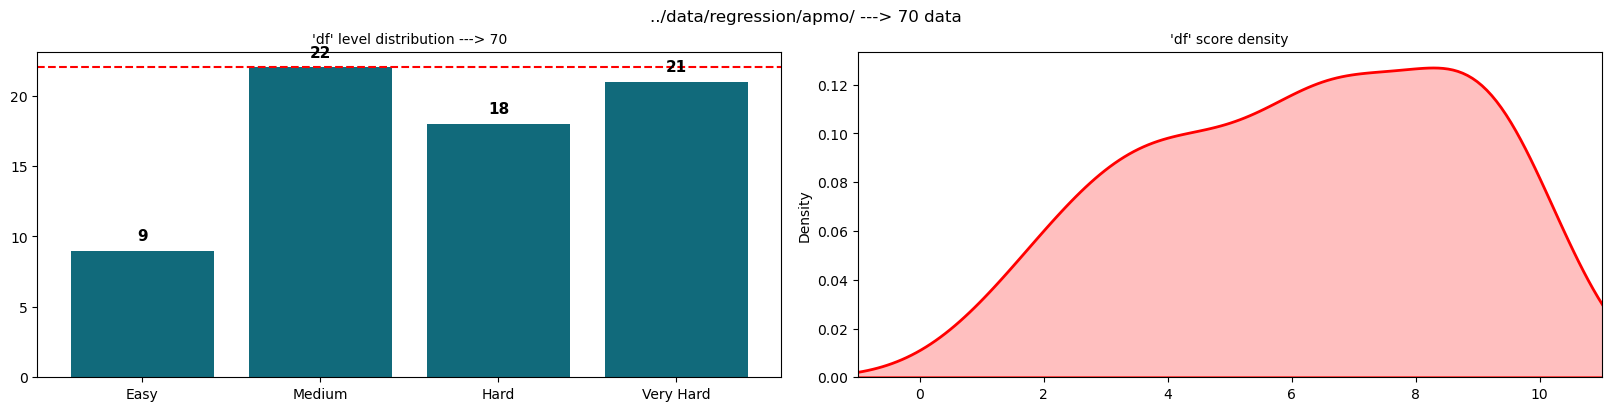

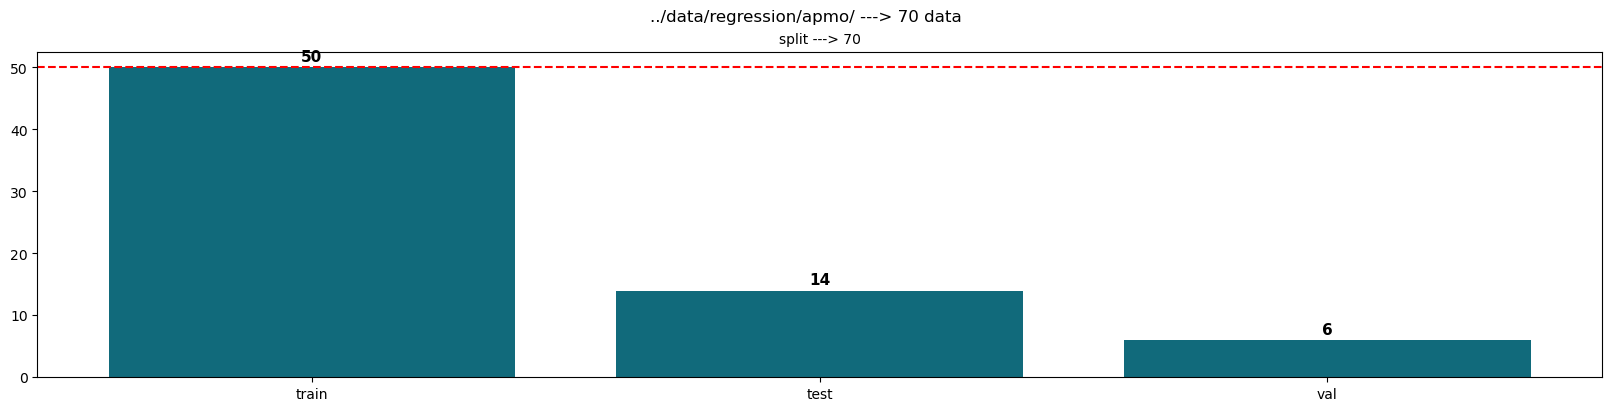

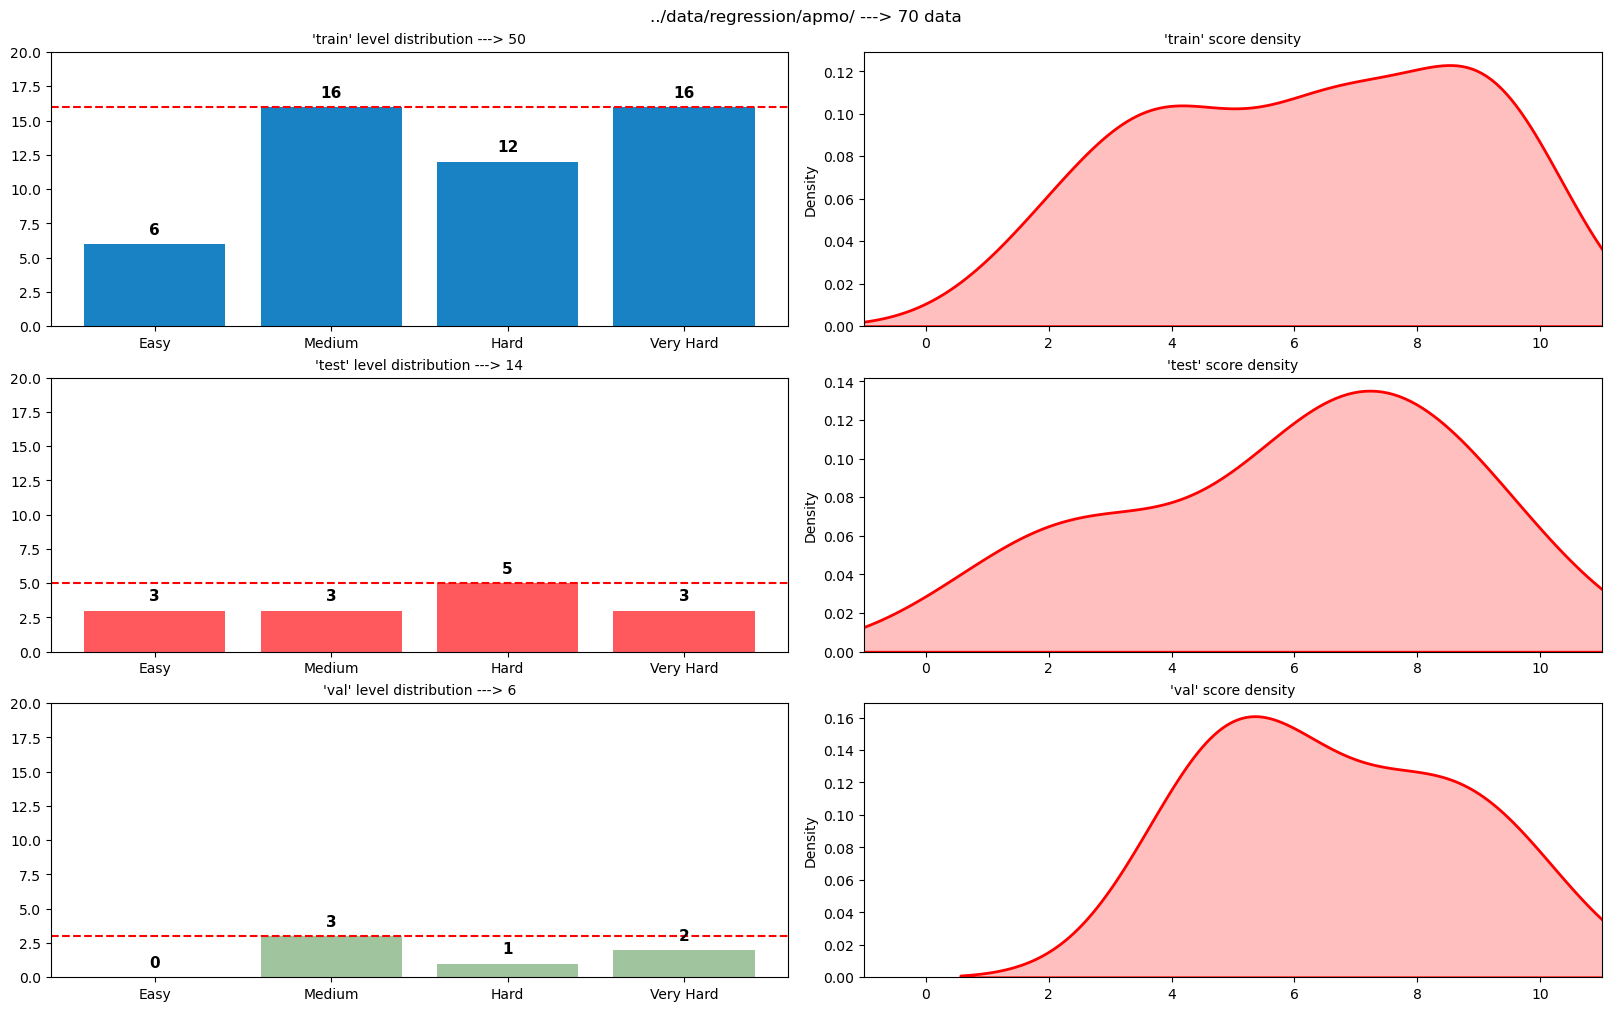

In [4]:
apmo_combined =    preapare_and_load_dataset("../data/regression/apmo/apmo_combined.csv")
split_and_save_data_for_regression_train_test_val_(apmo_combined, "../data/regression/apmo/", test_size=test_size, val_size=0.1, random_state=random_state)


## BENELUX

c:\wamp64\www\artofproblemsolving\models\utils\preprocessing_text.py:116: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text, 'html.parser').get_text()
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

#################### Saved at: '../data/regression/benelux/' ####################


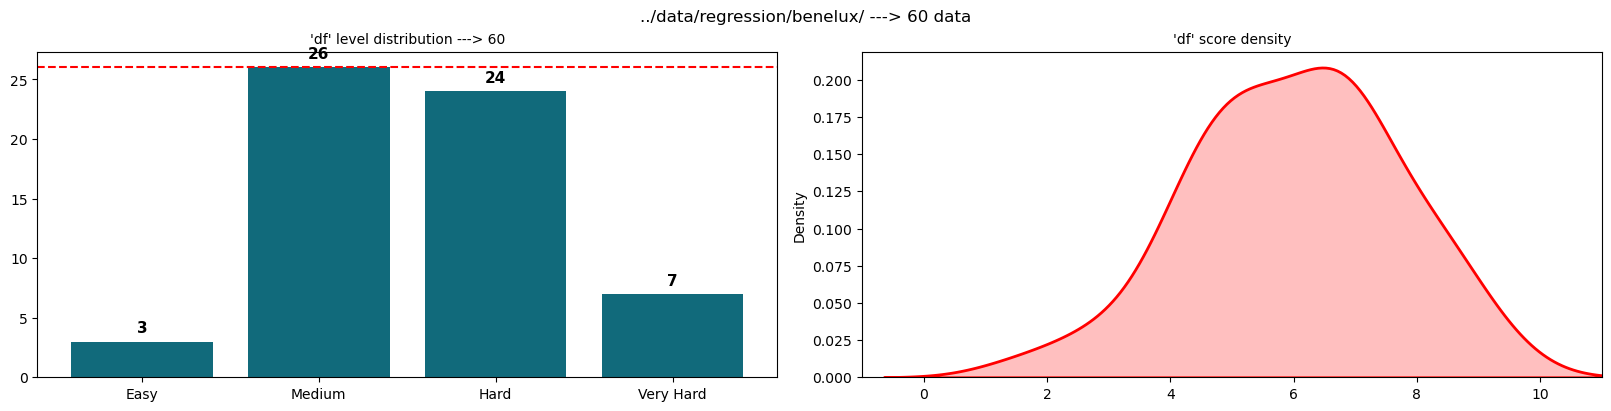

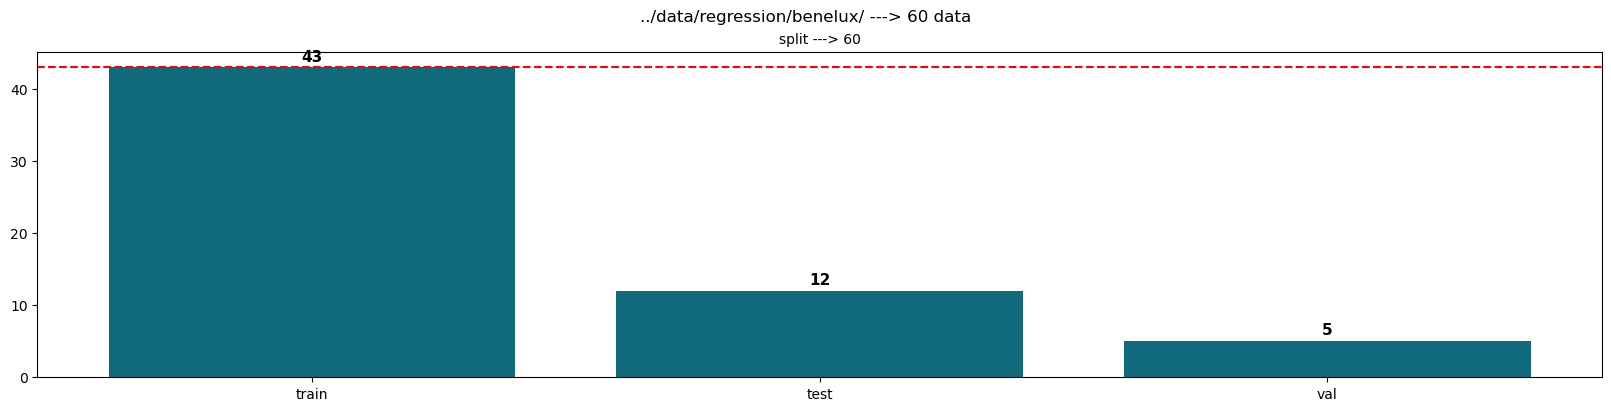

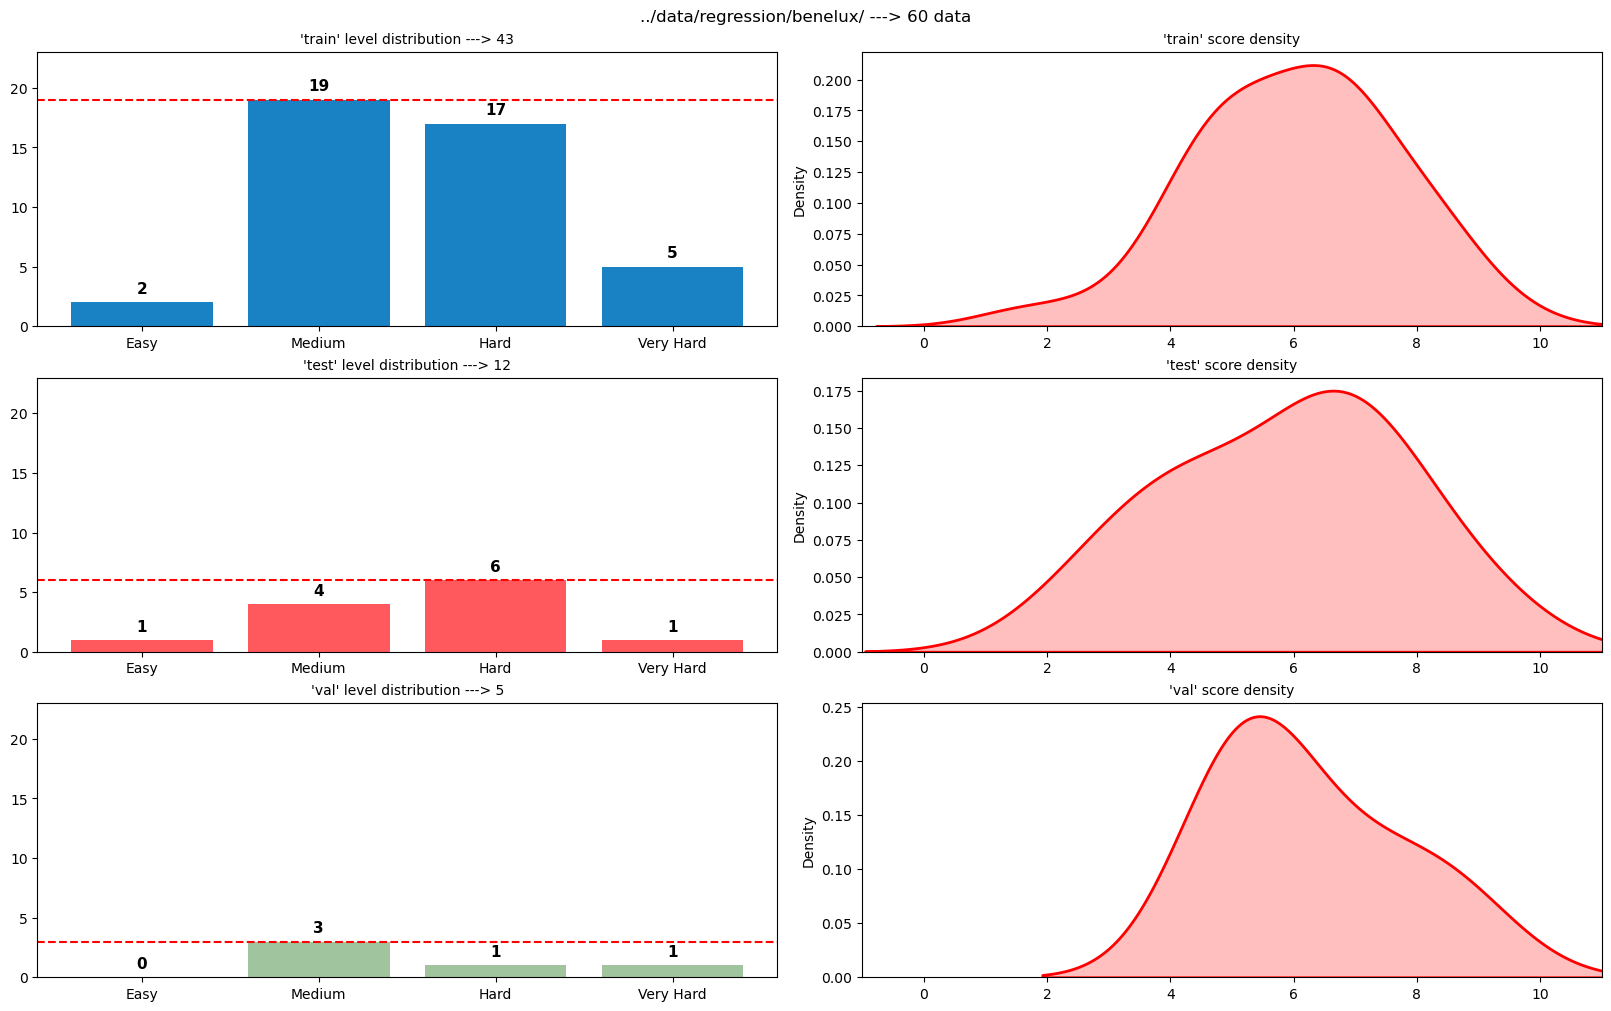

In [5]:
benelux_combined = preapare_and_load_dataset("../data/regression/benelux/benelux_combined.csv")
split_and_save_data_for_regression_train_test_val_(benelux_combined, "../data/regression/benelux/", test_size=test_size, val_size=0.1, random_state=random_state)


## EGMO

c:\wamp64\www\artofproblemsolving\models\utils\preprocessing_text.py:116: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text, 'html.parser').get_text()
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

#################### Saved at: '../data/regression/egmo/' ####################


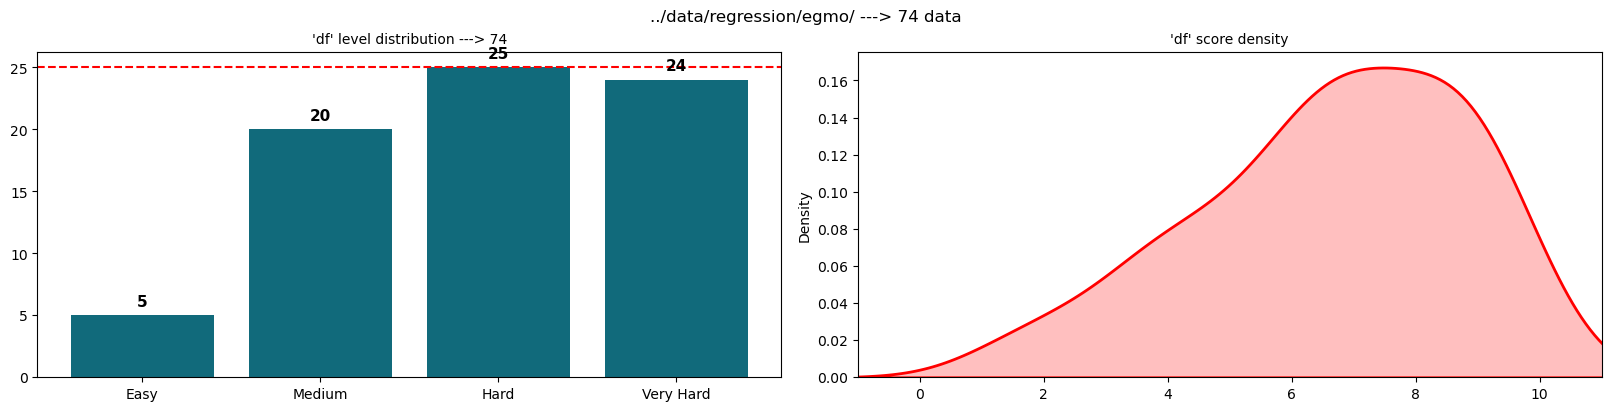

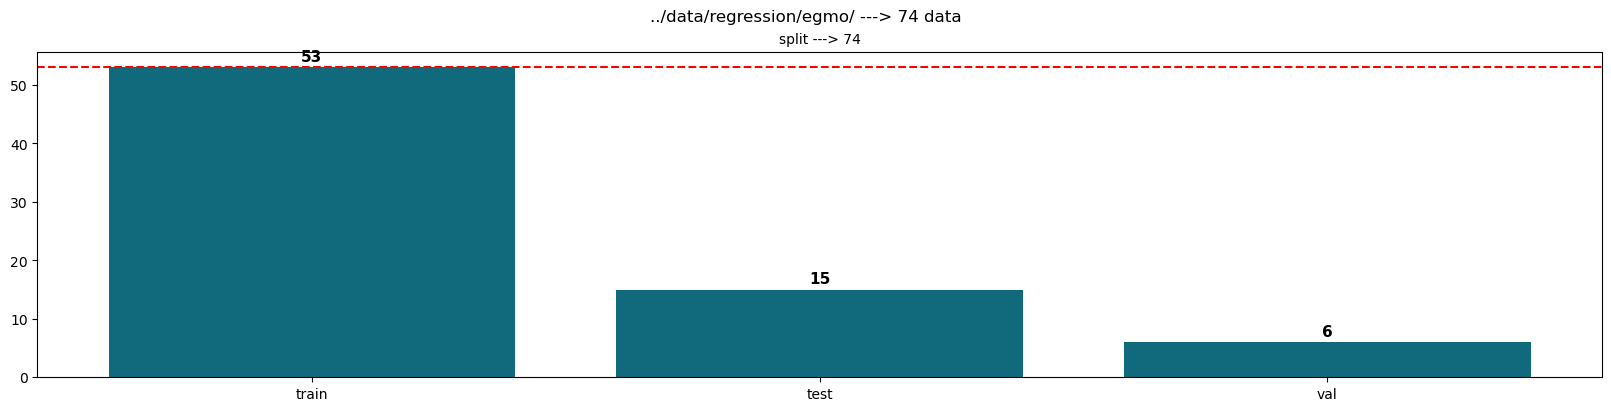

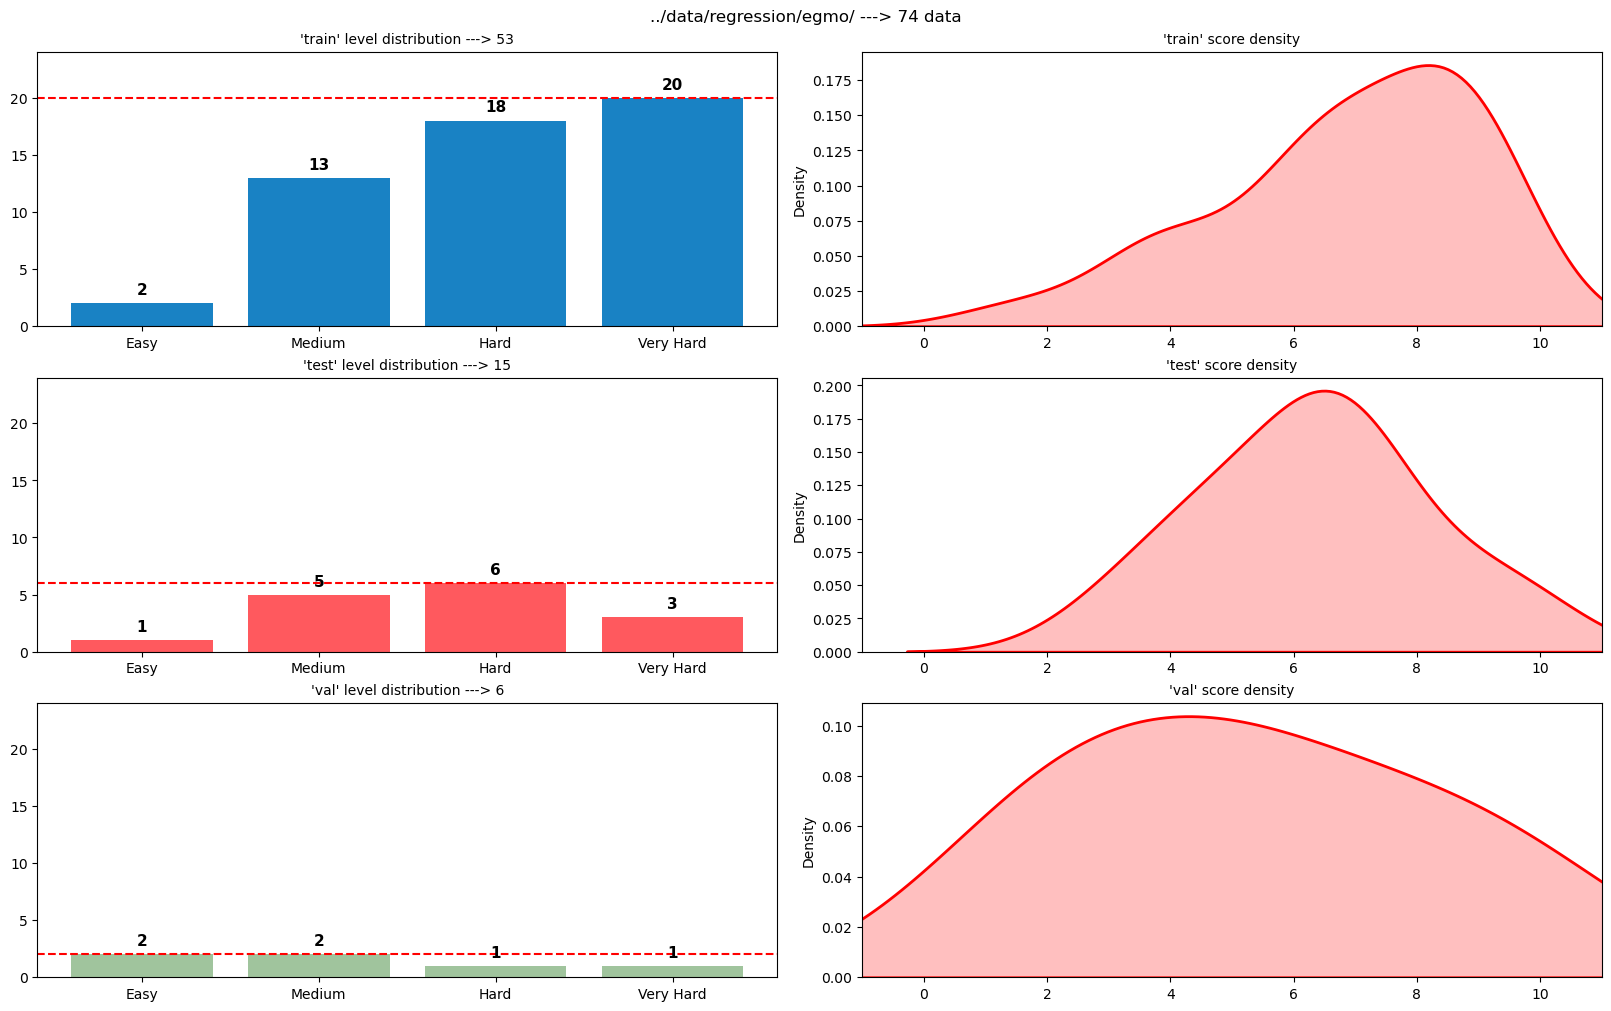

In [6]:
egmo_combined =    preapare_and_load_dataset("../data/regression/egmo/egmo_combined.csv")
split_and_save_data_for_regression_train_test_val_(egmo_combined, "../data/regression/egmo/", test_size=test_size, val_size=0.1, random_state=random_state)


## IMO

c:\wamp64\www\artofproblemsolving\models\utils\preprocessing_text.py:116: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text, 'html.parser').get_text()
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

#################### Saved at: '../data/regression/imo/' ####################


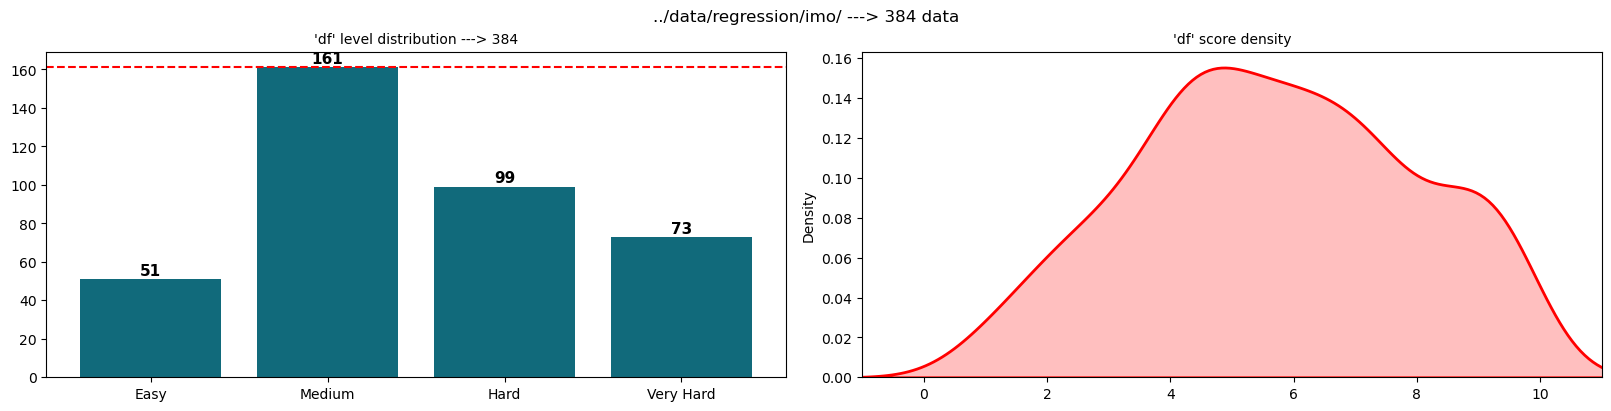

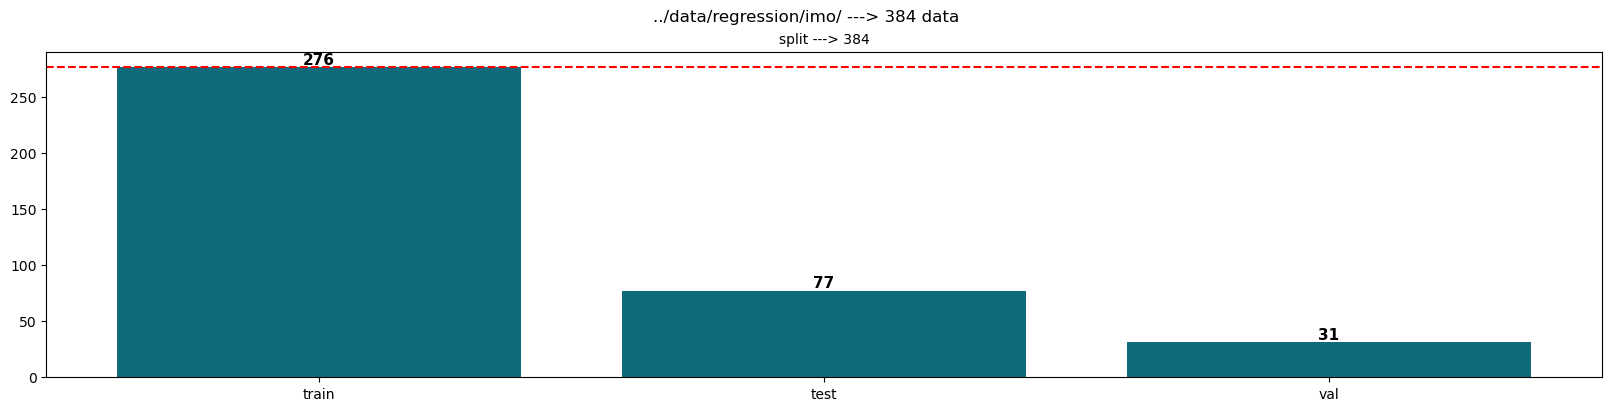

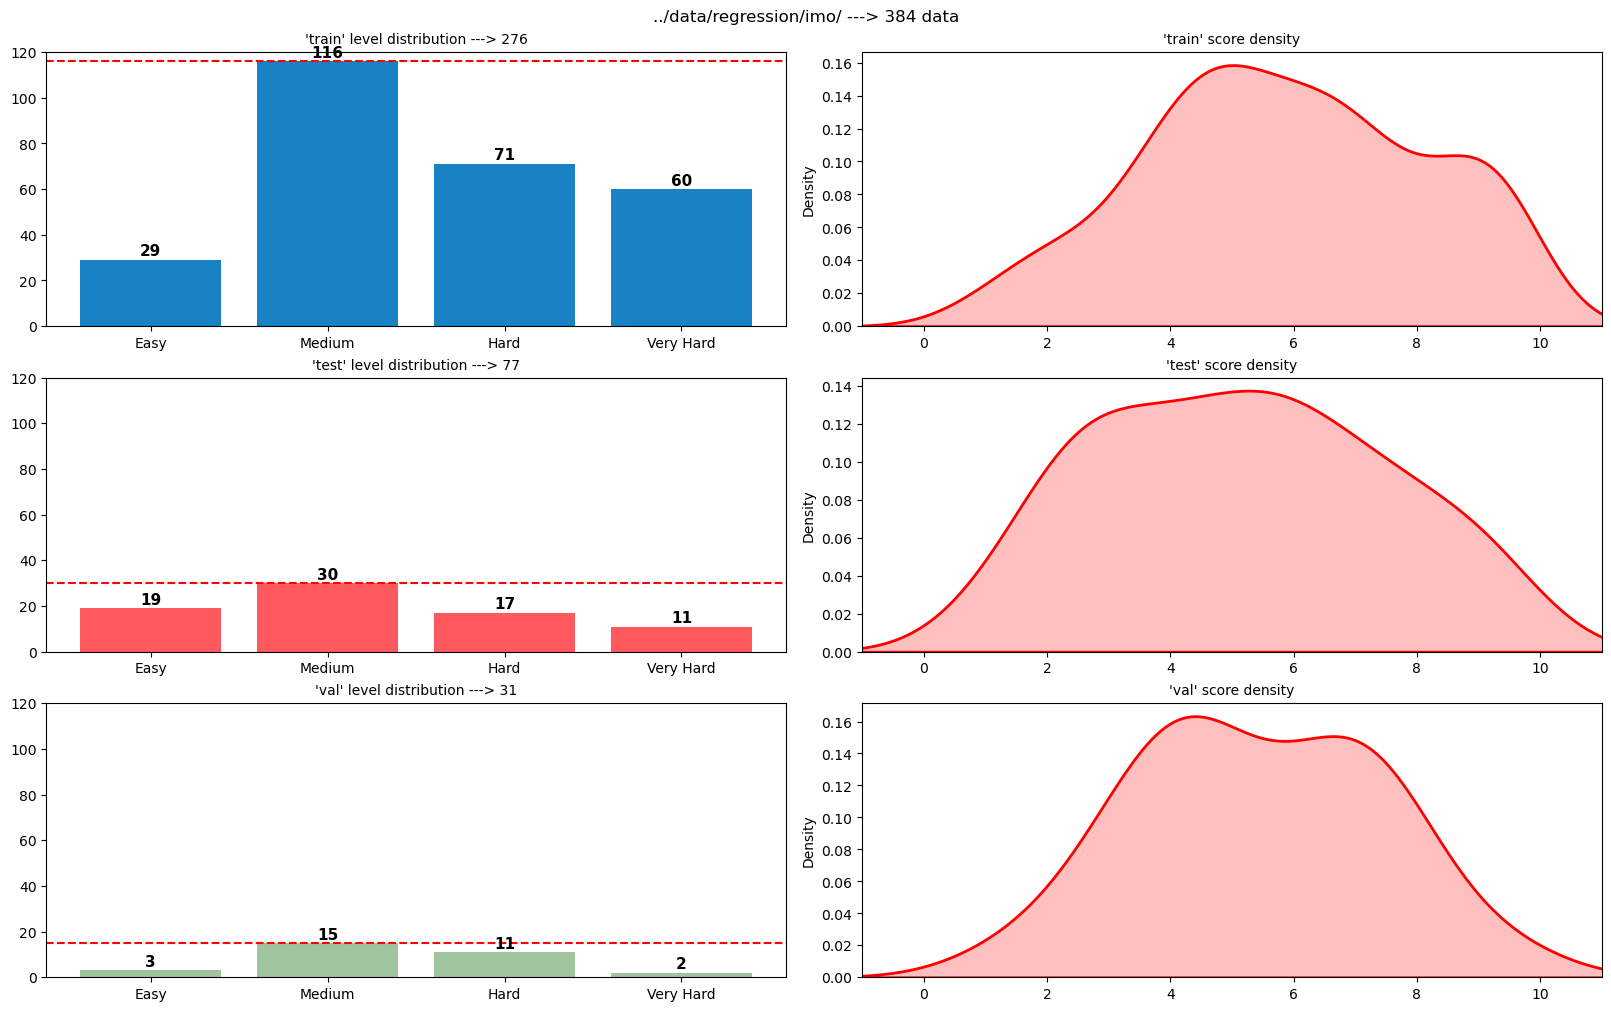

In [7]:
imo_combined =     preapare_and_load_dataset("../data/regression/imo/imo_combined.csv")
split_and_save_data_for_regression_train_test_val_(imo_combined, "../data/regression/imo/", test_size=test_size, val_size=0.1, random_state=random_state)


## Combined all

c:\wamp64\www\artofproblemsolving\models\utils\preprocessing_text.py:116: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_text = BeautifulSoup(text, 'html.parser').get_text()
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='red', linewidth=2, shade=True)
c:\wamp64\www\artofproblemsolving\models\utils\util.py:105: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

#################### Saved at: '../data/regression/' ####################


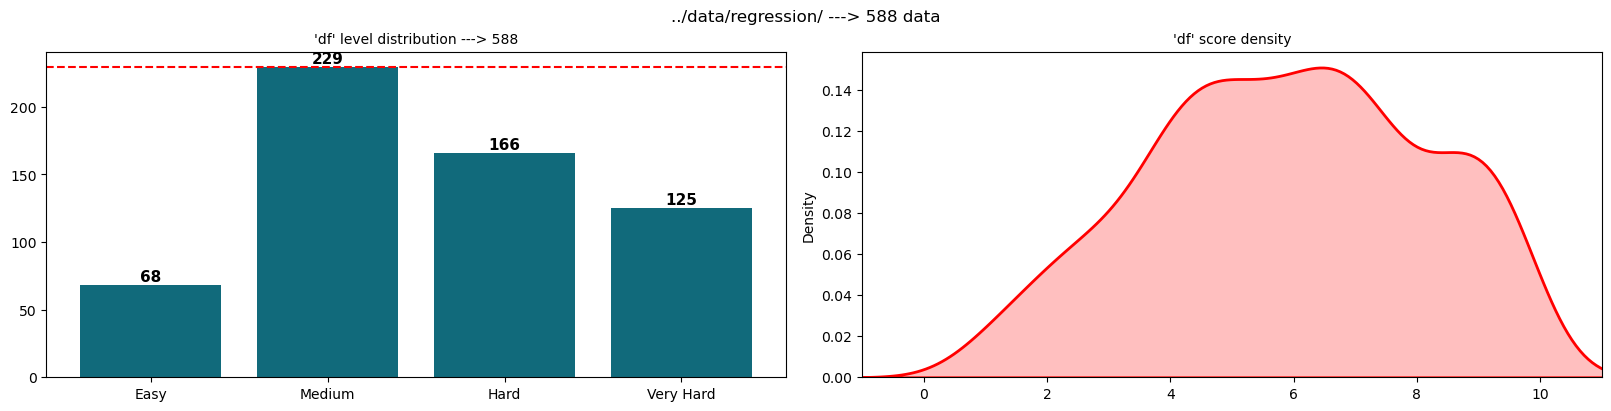

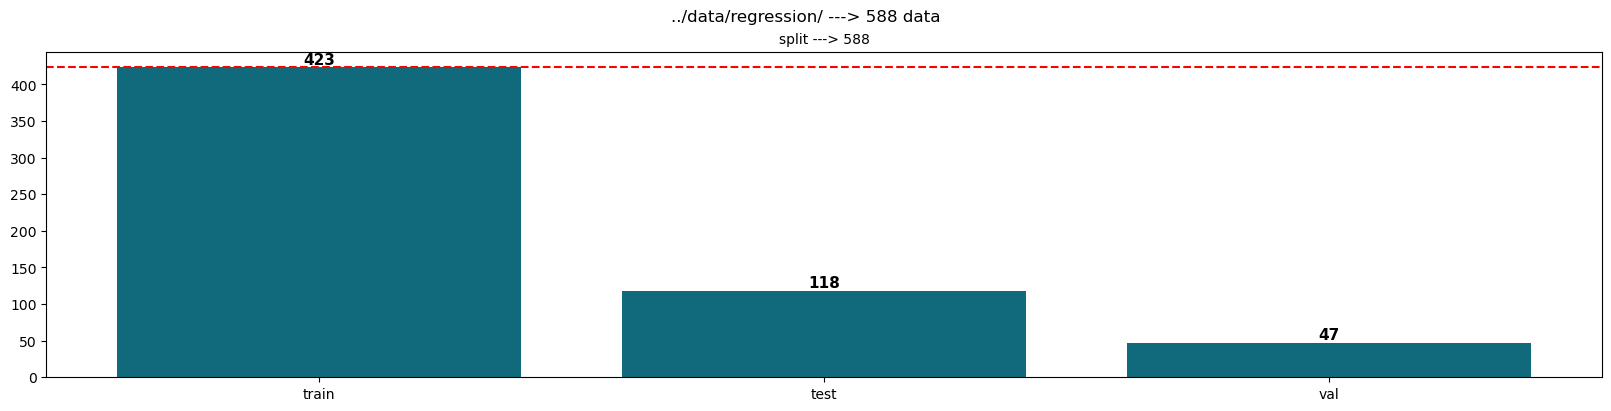

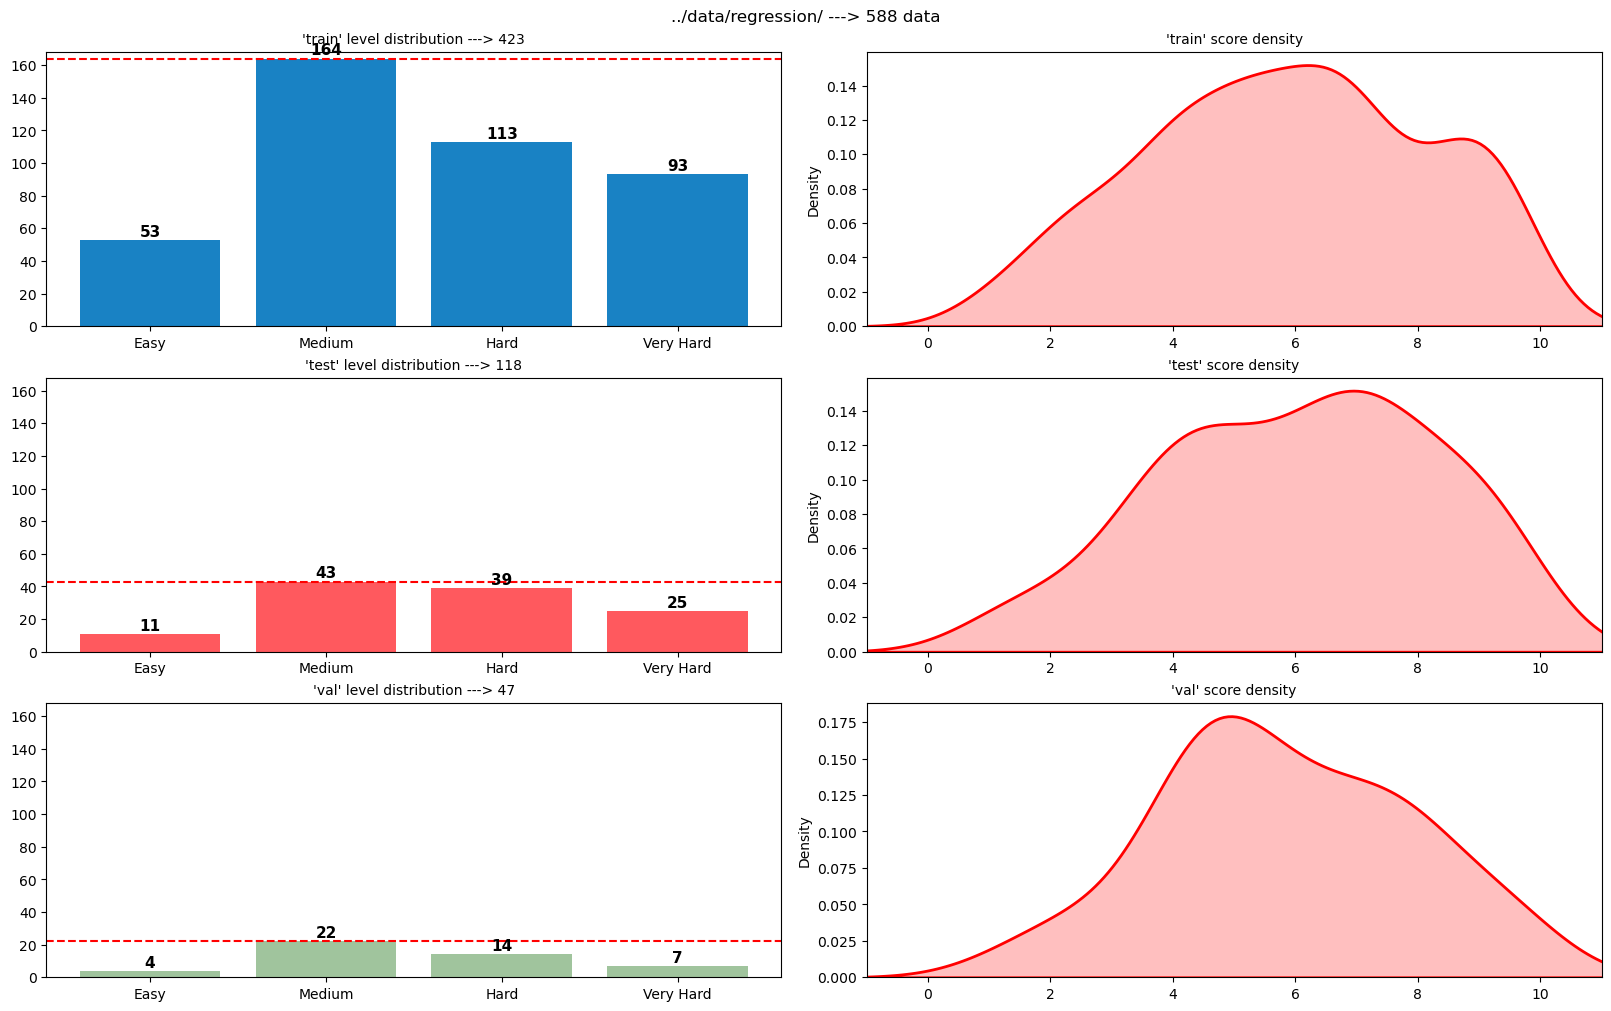

In [8]:
combined_all =     preapare_and_load_dataset("../data/regression/combined_all.csv")
split_and_save_data_for_regression_train_test_val_(combined_all, "../data/regression/", test_size=test_size, val_size=0.1, random_state=random_state)
